In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path

print(Path().cwd())
os.chdir(Path().cwd().parent)
print(Path().cwd())

/Users/davidspector/Home/Stanford/QuantUS Projects/PyQuantUS/CLI-Demos
/Users/davidspector/Home/Stanford/QuantUS Projects/PyQuantUS


## Select Image & Phantom and Parse

In [2]:
from pyquantus.image_loading.utc_loaders.options import get_scan_loaders

print("Available scan types:", list(get_scan_loaders().keys()))

Available scan types: ['terason_rf', 'canon_iq']


In [3]:
scan_type = 'canon_iq'

scan_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Canon IQ/Sample Patient 001/Preset_2/image.bin'
phantom_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Canon IQ/Phantom data/Preset_2/phantom2.bin'
scan_loader_kwargs = {}

In [4]:
from pyquantus.entrypoints import scan_loading_step

image_data = scan_loading_step(scan_type, scan_path, phantom_path, **scan_loader_kwargs)

/Users/davidspector/Home/Stanford/QuantUS Projects/PyQuantUS/pyquantus/image_loading/utc_loaders/canon_iq/parser.py:94: RuntimeWarning: divide by zero encountered in log10
  bmode = 20*np.log10(abs(iq))


## Load Segmentation

In [5]:
from pyquantus.seg_loading.options import get_seg_loaders

print("Available segmentation loaders:", list(get_seg_loaders().keys()))

Available segmentation loaders: ['pkl_roi', 'nifti_voi']


In [6]:
seg_loader = 'pkl_roi'

seg_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Canon IQ/Sample Patient 001/Preset_2/whole.pkl'
seg_loader_kwargs = {
    'assert_scan': False, # Checks if the seg is initially from the same scan
    'assert_phantom': False, # Checks if the seg is initially from the same phantom
}

In [7]:
from pyquantus.entrypoints import seg_loading_step

seg_data = seg_loading_step(seg_loader, image_data, seg_path, scan_path, phantom_path, **seg_loader_kwargs)

## Load Analysis Configuration

In [8]:
from pyquantus.analysis_config.utc_config.options import get_config_loaders

print("Available analysis config loaders:", list(get_config_loaders().keys()))

Available analysis config loaders: ['pkl_rf', 'philips_3d_config']


In [9]:
config_loader = 'pkl_rf'

config_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Canon IQ/Sample Patient 001/Preset_2/analysisConfig.pkl'
config_kwargs = {
    'assert_scan': False, # Checks if the config is initially from the same scan
    'assert_phantom': False, # Checks if the config is initially from the same phantom
}

In [10]:
from pyquantus.entrypoints import analysis_config_step

config_data = analysis_config_step(config_loader, config_path, scan_path, phantom_path, **config_kwargs)

## Customize & Perform Analysis

In [11]:
from pyquantus.analysis.options import get_analysis_types, get_required_kwargs

all_analysis_types, all_analysis_funcs = get_analysis_types()
print("Available analysis types:", list(all_analysis_types.keys()))

Available analysis types: ['paramap']


In [12]:
analysis_type = 'paramap'

print("Available analysis functions:", list(all_analysis_funcs[analysis_type].keys()))

Available analysis functions: ['compute_power_spectra', 'lizzi_feleppa', 'attenuation_coef', 'bsc', 'nakagami_params']


In [13]:
analysis_funcs = [] # list of analysis functions to run (empty list means all)

# Find all required kwargs
analysis_funcs = analysis_funcs if len(analysis_funcs) else list(all_analysis_funcs[analysis_type].keys())
required_kwargs = get_required_kwargs(analysis_type, analysis_funcs)
print("Required kwargs for current analysis:", required_kwargs)

Required kwargs for current analysis: ['ref_attenuation', 'ref_bsc']


In [14]:
analysis_kwargs = {
    'ref_attenuation': 0.7, # dB/cm/MHz
    'ref_bsc': 0.0006, # 1/cm-sr (@ center frequency)
}

In [15]:
from pyquantus.entrypoints import analysis_step

analysis_data = analysis_step(analysis_type, image_data, config_data, seg_data, analysis_funcs, **analysis_kwargs)

## Customize & Perform Visualizations

In [16]:
from pyquantus.visualizations.options import get_visualization_types

all_visualization_types, all_visualization_funcs = get_visualization_types()

print("Available visualization types:", list(all_visualization_types.keys()))

Available visualization types: ['paramap']


In [17]:
visualization_type = 'paramap'

print("Available visualization functions:", list(all_visualization_funcs[visualization_type].keys()))

Available visualization functions: ['plot_ps_data', 'paramaps']


In [18]:
# List of visualization functions to run (empty list means no visualization)
visualization_funcs = ['paramaps', 'plot_ps_data'] 

visualization_kwargs = {
    # 'paramap_folder_path': 'visualization_results', # folder to save visualizations
}

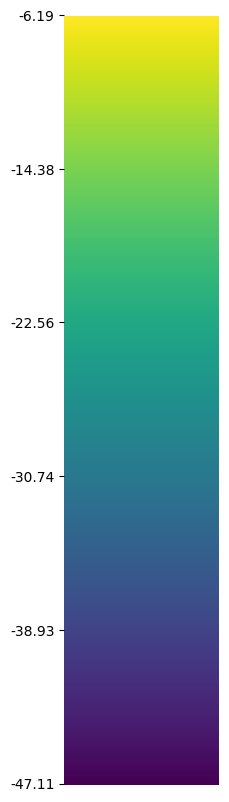

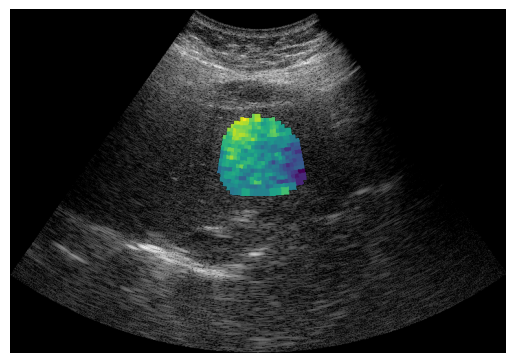

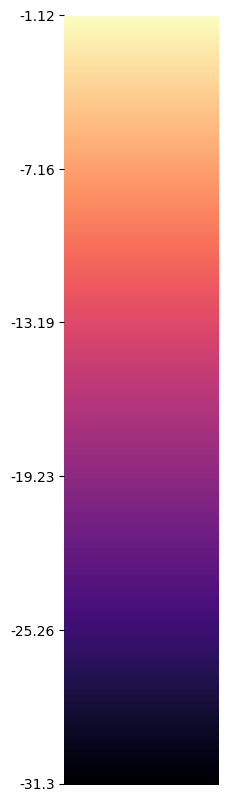

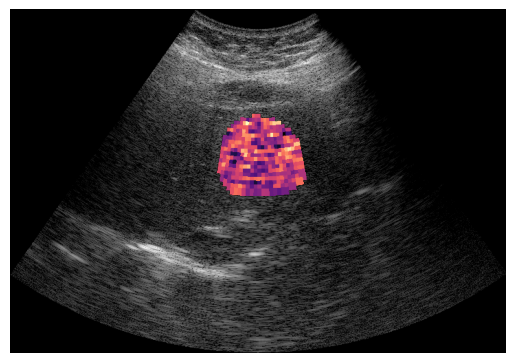

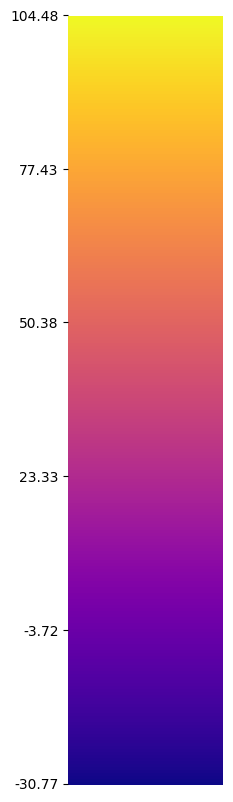

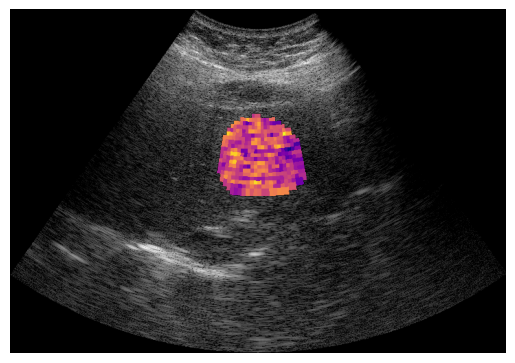

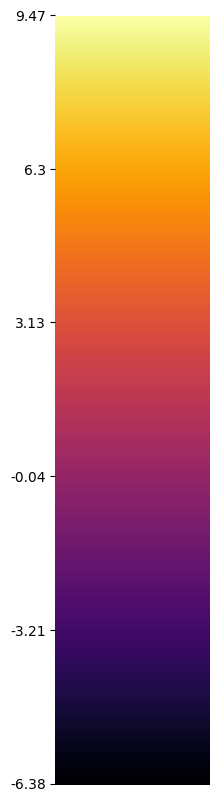

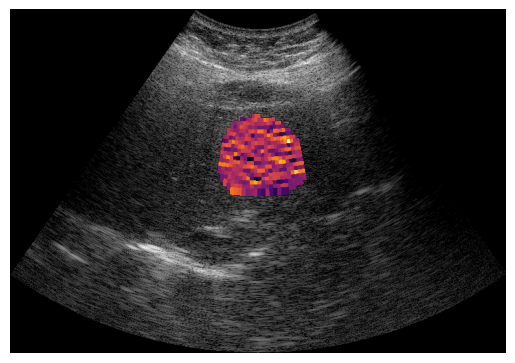

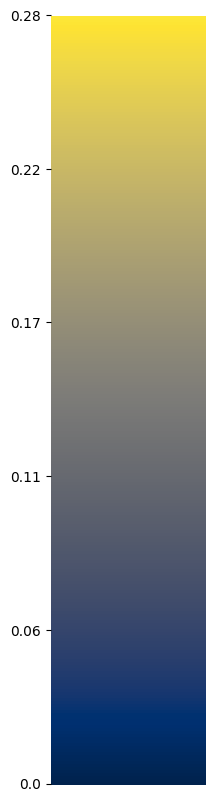

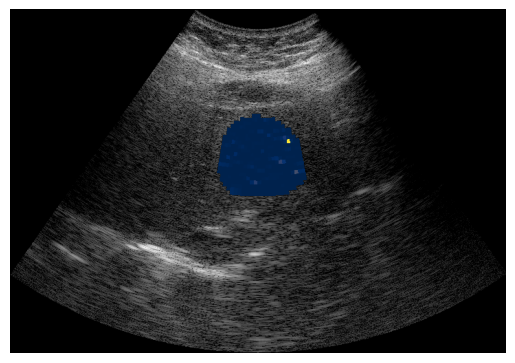

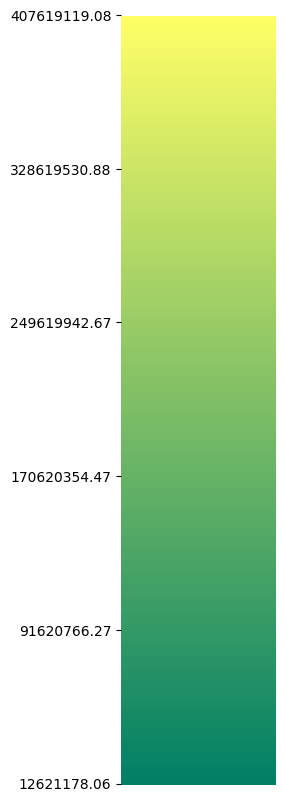

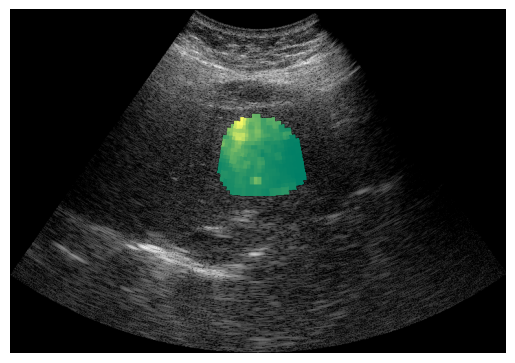

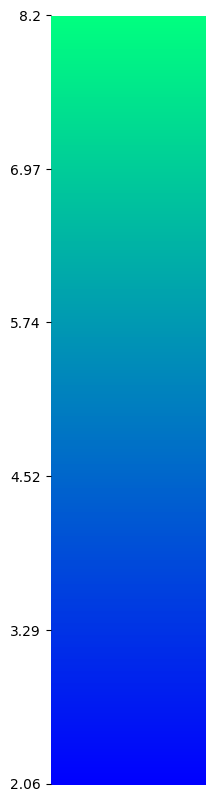

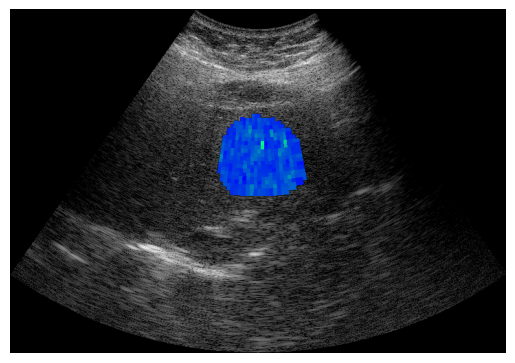

In [19]:
from pyquantus.entrypoints import visualization_step
from IPython.display import display, HTML

visualization_data = visualization_step(visualization_type, analysis_data, visualization_funcs, **visualization_kwargs);
display(HTML("<style>.output_wrapper, .output {display: none;}</style>"))

## Customize & Perform Data Export

In [20]:
from pyquantus.data_export.options import get_data_export_types

all_data_export_types, all_data_export_funcs = get_data_export_types()
print("Available data export types:", list(all_data_export_types.keys()))

Available data export types: ['pkl', 'csv']


In [21]:
data_export_type = 'csv'

print("Available data export functions:", list(all_data_export_funcs[data_export_type].keys()))

Available data export functions: ['descr_vals']


In [22]:
data_export_funcs = ['descr_vals']
data_export_path = 'test.csv'

In [29]:
from pyquantus.entrypoints import data_export_step

data_export_obj = data_export_step(data_export_type, visualization_data, data_export_path, data_export_funcs)